In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os 
import cv2 


In [5]:
x = ["C://Users//jiwon//Covid Project//DATA//train//COVID19"]

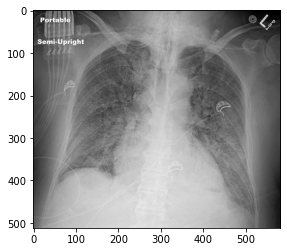

In [7]:
for category in x:
    y = category
    for images in os.listdir(y):  
         image_array = cv2.imread(str(os.path.join(category, images)))
         plt.imshow(image_array)
         break
    break


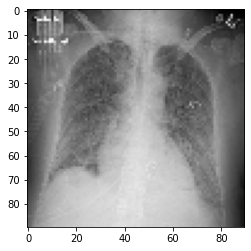

In [8]:
image_size = 90

new_array = cv2.resize(image_array, (image_size, image_size))
plt.imshow(new_array, cmap = "gray")

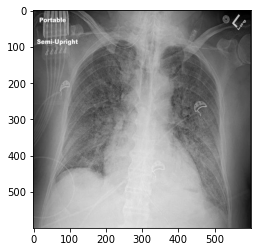

In [9]:
image_size = 600

new_array = cv2.resize(image_array, (image_size, image_size))
plt.imshow(new_array)

In [10]:
def createData(x, training_data):            
  for category in x:
       y = category
       class_num = x.index(category)
       for images in os.listdir(y):
          try:
            q = os.path.join(category, images) 
            new_array = cv2.imread(q, cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(new_array, (600,600))
            training_data.append([new_array, class_num])
          except Exception as e: 
            pass


In [11]:
x = ["C://Users//jiwon//Covid Project//DATA//train//COVID19", "C://Users//jiwon//Covid Project//DATA//train//NORMAL",
"C://Users//jiwon//Covid Project//DATA//train//PNEUMONIA", "C://Users//jiwon//Covid Project//DATA//train//TURBERCULOSIS"]

training_data = []
createData(x,training_data)

In [12]:
import random 
random.shuffle(training_data)

Before doing any testing really we have to manipulate and reorganize the data because we want to split our training and validation data into 60%, 20%, 20% roughly. We can use the original testing data to test it as an additional metric just in case. 

In [16]:
from keras.utils import to_categorical

X_train = []
Y_train = []

for i, j in training_data: 
    X_train.append(i)
    Y_train.append(j)

Y_train = to_categorical(Y_train)
X_train = np.array(X_train)

print(len(X_train))

4464


In [24]:
val = ["C://Users//jiwon//Covid Project//DATA//val//COVID19", "C://Users//jiwon//Covid Project//DATA//val//NORMAL",
"C://Users//jiwon//Covid Project//DATA//val//PNEUMONIA", "C://Users//jiwon//Covid Project//DATA//val//TURBERCULOSIS"]

val_data = [] 
createData(val, val_data)

In [25]:
random.shuffle(val_data)

In [26]:
X_val = []
Y_val = []

for i, j in val_data:
    X_val.append(i)
    Y_val.append(j)

Y_val = to_categorical(Y_val)
X_val = np.array(X_val)
print(len(X_val))

1268


In [27]:
test = ["C://Users//jiwon//Covid Project//DATA//test//COVID19", "C://Users//jiwon//Covid Project//DATA//test//NORMAL",
"C://Users//jiwon//Covid Project//DATA//test//PNEUMONIA", "C://Users//jiwon//Covid Project//DATA//test//TURBERCULOSIS"]

test_data = []
createData(test, test_data)

In [28]:
random.shuffle(test_data)

Before going on in creating our model, I'm going to examine the distributions of our data along with the distributions of training, validation, and testing data.

In [29]:
X_test = []
Y_test = []

for i, j in test_data:
    X_test.append(i)
    Y_test.append(j)
Y_test = to_categorical(Y_test)
X_test = np.array(X_test)
print(len(X_test))

1403


In [163]:
covid_train = ["C://Users//jiwon//Covid Project//DATA//train//COVID19"]
covid_val = ["C://Users//jiwon//Covid Project//DATA//val//COVID19"]
covid_test = ["C://Users//jiwon//Covid Project//DATA//test//COVID19"]
covid_count = 0

covid_trainc = 0 
covid_valc = 0 
covid_testc = 0 
for i in os.listdir(covid_train[0]):
    covid_count +=1 
    covid_trainc +=1
for i in os.listdir(covid_val[0]):
    covid_count+=1
    covid_valc +=1
for i in os.listdir(covid_test[0]):
    covid_count+=1
    covid_testc +=1 

print(covid_count)

576


In [165]:
Normal_train = ["C://Users//jiwon//Covid Project//DATA//train//NORMAL"]
Normal_val = ["C://Users//jiwon//Covid Project//DATA//val//NORMAL"]
Normal_test = ["C://Users//jiwon//Covid Project//DATA//test//NORMAL"]
Normal_count = 0

Normal_trainc = 0 
Normal_valc = 0
Normal_testc = 0


for i in os.listdir(Normal_train[0]):
    Normal_count +=1 
    Normal_trainc += 1
for i in os.listdir(Normal_train[0]):
    Normal_count +=1
    Normal_valc +=1 
for i in os.listdir(Normal_train[0]):
    Normal_count +=1
    Normal_testc +=1 

print(Normal_count)

2247


In [164]:
pneumonia_train = ["C://Users//jiwon//Covid Project//DATA//train//PNEUMONIA"]
pneumonia_val = ["C://Users//jiwon//Covid Project//DATA//val//COVID19"]
pneumonia_test = ["C://Users//jiwon//Covid Project//DATA//test//COVID19"]
pneumonia_count = 0

pneumonia_trainc = 0 
pneumonia_valc = 0 
pneumonia_testc = 0 
for i in os.listdir(pneumonia_train[0]):
    pneumonia_count +=1 
    pneumonia_trainc +=1 
for i in os.listdir(pneumonia_val[0]):
    pneumonia_count+=1
    pneumonia_valc+=1

for i in os.listdir(pneumonia_test[0]):
    pneumonia_count+=1
    pneumonia_testc +=1 

print(pneumonia_count)

3370


In [166]:
Turberculosis_train = ["C://Users//jiwon//Covid Project//DATA//train//TURBERCULOSIS"]
Turberculosis_test = ["C://Users//jiwon//Covid Project//DATA//test//TURBERCULOSIS"]
Turberculosis_val = ["C://Users//jiwon//Covid Project//DATA//val//TURBERCULOSIS"]

Turberculosis_count = 0
Turberculosis_trainc = 0
Turberculosis_valc = 0
Turberculosis_testc = 0

for i in os.listdir(Turberculosis_train[0]):
    Turberculosis_trainc +=1 
    Turberculosis_count +=1 
for i in os.listdir(Turberculosis_val[0]):
    Turberculosis_count +=1
    Turberculosis_valc +=1 
for i in os.listdir(Turberculosis_test[0]):
    Turberculosis_count +=1
    Turberculosis_testc +=1 

print(Turberculosis_count)

703


In [167]:
total = Turberculosis_count + Normal_count + pneumonia_count + covid_count

print("Covid", covid_count/total)
print("Normal", Normal_count/total)
print("Pneumonia", pneumonia_count/ total)
print("Tuber", Turberculosis_count/total)


Covid 0.08352668213457076
Normal 0.3258410672853828
Pneumonia 0.4886890951276102
Tuber 0.1019431554524362


In [171]:
print("CovidTrain",covid_trainc/(Normal_trainc + covid_trainc + pneumonia_trainc + Turberculosis_trainc) )
print("NormalTrain",Normal_trainc/(Normal_trainc + covid_trainc + pneumonia_trainc + Turberculosis_trainc))
print("PneumoniaTrain",pneumonia_trainc/(Normal_trainc + covid_trainc + pneumonia_trainc + Turberculosis_trainc) )
print("TurberTrain",Turberculosis_trainc/(Normal_trainc + covid_trainc + pneumonia_trainc + Turberculosis_trainc) )

CovidTrain 0.06272401433691756
NormalTrain 0.1677867383512545
PneumoniaTrain 0.6886200716845878
TurberTrain 0.08086917562724015


In [169]:
print("CovidVal",covid_valc/(Normal_valc + covid_valc + pneumonia_valc + Turberculosis_valc))
print("NormalVal",Normal_valc/(Normal_valc + covid_valc + pneumonia_valc + Turberculosis_valc))
print("PneumoniaVal",pneumonia_valc/(Normal_valc + covid_valc + pneumonia_valc + Turberculosis_valc))
print("TurberVal",Turberculosis_valc/(Normal_valc + covid_valc + pneumonia_valc + Turberculosis_valc))

CovidVal 0.09990917347865577
NormalVal 0.6802906448683016
PneumoniaVal 0.09990917347865577
TurberVal 0.11989100817438691


In [172]:
print("CovidTest",covid_testc/(Normal_testc + covid_testc + pneumonia_testc + Turberculosis_testc))
print("NormalTest",Normal_testc/(Normal_testc + covid_testc + pneumonia_testc + Turberculosis_testc))
print("PneumoniaTest",pneumonia_testc/(Normal_testc + covid_testc + pneumonia_testc + Turberculosis_testc))
print("TuberTest",Turberculosis_testc/(Normal_testc + covid_testc + pneumonia_testc + Turberculosis_testc))

CovidTest 0.13974455296769348
NormalTest 0.5627347858752817
PneumoniaTest 0.13974455296769348
TuberTest 0.15777610818933133


We take note that in particular the testing data set distribution within subpopulations are a bit different compared to the actual total data distribution. However, this should not have a significant difference in testing. 

In [30]:
leakyRelu = keras.layers.LeakyReLU(0.15)

In [49]:
from keras.regularizers import l2
from keras_tuner import RandomSearch 
from keras_tuner.engine.hyperparameters import HyperParameter

def Model01(hp):
    Reg = l2(l2=0.000035)
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(input_shape = (600, 600, 1), filters = hp.Int("filterNum01", min_value = 64, max_value = 128, step = 32), strides = 5, activation = leakyRelu, kernel_size = hp.Int("ksize", min_value = 5, max_value = 9, step = 2), padding = "same", kernel_initializer= "he_uniform"))
    model.add(keras.layers.MaxPool2D(pool_size = (5,5), strides = (2,2), padding = "valid"))
    model.add(keras.layers.BatchNormalization())

    model.add(keras.layers.Conv2D(filters = hp.Int("filterNum02",min_value = 192, max_value = 256, step = 64), kernel_size = 5, strides = 3, padding = "same", activation = leakyRelu, kernel_initializer = "he_uniform"))
    model.add(keras.layers.MaxPool2D(pool_size = (3,3), strides = (2,2),  padding = "valid"))
    model.add(keras.layers.BatchNormalization())

    model.add(keras.layers.Conv2D(filters = 256, kernel_size = 3, strides = 3, padding = "same", activation = leakyRelu, kernel_initializer = "he_uniform"))
    model.add(keras.layers.AveragePooling2D(pool_size = (3,3), strides = (2,2) , padding = "valid"))
    model.add(keras.layers.BatchNormalization())

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(units = hp.Int("units", min_value = 128, max_value = 196, step = 34), activation= tf.nn.selu,kernel_regularizer = Reg, kernel_initializer = "lecun_normal"))
    model.add(keras.layers.Dropout(rate = 0.24))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(units = 64, activation = leakyRelu,kernel_regularizer = Reg, kernel_initializer = "lecun_normal"))
    model.add(keras.layers.Dropout(rate = 0.20))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(units = 4, activation= "softmax",kernel_regularizer = Reg))

    model.compile(loss = "categorical_crossentropy", metrics = "accuracy", optimizer = "rmsprop")
    return model


In [50]:
tuner = RandomSearch(Model01, objective = "val_accuracy", max_trials = 54, executions_per_trial = 1, directory = "COVIDPROJECT", project_name = "DiseaseDetection")
tuner.search_space_summary()

Search space summary
Default search space size: 4
filterNum01 (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 128, 'step': 32, 'sampling': None}
ksize (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 9, 'step': 2, 'sampling': None}
filterNum02 (Int)
{'default': None, 'conditions': [], 'min_value': 192, 'max_value': 256, 'step': 64, 'sampling': None}
units (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 196, 'step': 34, 'sampling': None}


We will select the best three models and train with 20 epochs and plot the graphs of the behaviors to analyze.

In [59]:
for i in range(13):
    tuner.search(X_train, Y_train, validation_data = (X_val, Y_val), epochs = 13, batch_size = 64)

Trial 52 Complete [00h 23m 32s]
val_accuracy: 0.960567831993103

Best val_accuracy So Far: 0.9668769836425781
Total elapsed time: 23h 14m 56s
INFO:tensorflow:Oracle triggered exit


In [64]:
models = tuner.get_best_models(3)


In [66]:
first_model = models[0]
second_model = models[1]
third_model = models[2]


In [80]:
models_hp = tuner.get_best_hyperparameters(3)


keras_tuner.engine.hyperparameters.HyperParameters

In [82]:
print(first_model.summary())
print(tuner.get_best_hyperparameters(3)[0].values)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 120, 120, 96)      2496      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 58, 58, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 58, 58, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 256)        0         
 2D)                                                             
                                                        

In [83]:
print(second_model.summary())
print(tuner.get_best_hyperparameters(3)[1].values)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 120, 120, 128)     10496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 58, 58, 128)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 58, 58, 128)      512       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 192)       614592    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 192)        0         
 2D)                                                             
                                                        

In [84]:
print(third_model.summary())
print(tuner.get_best_hyperparameters(3)[2].values)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 120, 120, 128)     3328      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 58, 58, 128)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 58, 58, 128)      512       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 256)       819456    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 256)        0         
 2D)                                                             
                                                        

In [85]:
def constructModel(filterNum, ksize, filterNum2, units):
    Reg = l2(l2=0.000035)
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(input_shape = (600, 600, 1), filters = filterNum, strides = 5, activation = leakyRelu, kernel_size = ksize, padding = "same", kernel_initializer= "he_uniform"))
    model.add(keras.layers.MaxPool2D(pool_size = (5,5), strides = (2,2), padding = "valid"))
    model.add(keras.layers.BatchNormalization())

    model.add(keras.layers.Conv2D(filters = filterNum2, kernel_size = 5, strides = 3, padding = "same", activation = leakyRelu, kernel_initializer = "he_uniform"))
    model.add(keras.layers.MaxPool2D(pool_size = (3,3), strides = (2,2),  padding = "valid"))
    model.add(keras.layers.BatchNormalization())

    model.add(keras.layers.Conv2D(filters = 256, kernel_size = 3, strides = 3, padding = "same", activation = leakyRelu, kernel_initializer = "he_uniform"))
    model.add(keras.layers.AveragePooling2D(pool_size = (3,3), strides = (2,2) , padding = "valid"))
    model.add(keras.layers.BatchNormalization())

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(units = units, activation= tf.nn.selu,kernel_regularizer = Reg, kernel_initializer = "lecun_normal"))
    model.add(keras.layers.Dropout(rate = 0.24))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(units = 64, activation = leakyRelu,kernel_regularizer = Reg, kernel_initializer = "lecun_normal"))
    model.add(keras.layers.Dropout(rate = 0.20))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(units = 4, activation= "softmax",kernel_regularizer = Reg))

    model.compile(loss = "categorical_crossentropy", metrics = "accuracy", optimizer = "rmsprop")

    return model

In [110]:
callbacks = keras.callbacks.ModelCheckpoint(monitor = "val_accuracy", save_best_only = True, filepath = "model1.h5")

In [105]:
callbacks2 = [ keras.callbacks.ModelCheckpoint(monitor = "val_accuracy", mode = "max", save_best_only = True, filepath = "model2.h5")]

In [113]:
callbacks3 = keras.callbacks.ModelCheckpoint(monitor = "val_accuracy", mode = "max", save_best_only = True, filepath = "model3.h5")

In [96]:
model1 = constructModel(96,5,256,196)
history1 = model1.fit(X_train, Y_train, validation_data = (X_val, Y_val), callbacks = callbacks, epochs = 20, batch_size = 64)

Epoch 1/20
70/70 [==============================] - 111s 2s/step - loss: 0.7186 - accuracy: 0.7746 - val_loss: 7.1952 - val_accuracy: 0.2342
Epoch 2/20
70/70 [==============================] - 113s 2s/step - loss: 0.3490 - accuracy: 0.8981 - val_loss: 0.5095 - val_accuracy: 0.8454
Epoch 3/20
70/70 [==============================] - 112s 2s/step - loss: 0.2408 - accuracy: 0.9299 - val_loss: 0.3402 - val_accuracy: 0.8935
Epoch 4/20
70/70 [==============================] - 112s 2s/step - loss: 0.1814 - accuracy: 0.9474 - val_loss: 0.2565 - val_accuracy: 0.9196
Epoch 5/20
70/70 [==============================] - 111s 2s/step - loss: 0.1305 - accuracy: 0.9581 - val_loss: 0.4185 - val_accuracy: 0.8596
Epoch 6/20
70/70 [==============================] - 112s 2s/step - loss: 0.1175 - accuracy: 0.9635 - val_loss: 1.3863 - val_accuracy: 0.6680
Epoch 7/20
70/70 [==============================] - 113s 2s/step - loss: 0.0851 - accuracy: 0.9733 - val_loss: 0.1629 - val_accuracy: 0.9519
Epoch 8/20
70

In [98]:
model1.evaluate(X_val, Y_val)

40/40 [==============================] - 7s 183ms/step - loss: 0.1952 - accuracy: 0.9582


[0.19518952071666718, 0.9582018852233887]

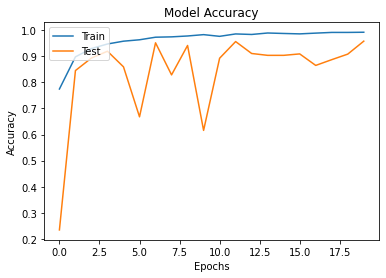

In [132]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Evaluating with the transformed/modified data that we have: 

In [117]:
model1.evaluate(X_test,Y_test, batch_size = None)

44/44 [==============================] - 9s 197ms/step - loss: 0.6068 - accuracy: 0.8888


[0.6068053245544434, 0.8888096809387207]

Evaluating with an F1 score for transformed:

In [127]:
Y_predictions = model1.predict(X_test).argmax(axis = -1)
print(to_categorical(Y_predictions))

44/44 [==============================] - 7s 153ms/step
[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


In [129]:
from sklearn.metrics import f1_score
Y_predictions = to_categorical(model1.predict(X_test).argmax(axis = -1))
score = f1_score(Y_test,Y_predictions, average = None)
print(score)
print(np.average(score))

44/44 [==============================] - 7s 151ms/step
[0.93261456 0.79881657 0.90404798 0.94588235]
0.8953403630641431
